<a href="https://colab.research.google.com/github/madanbolla/chestxraydata/blob/master/chestxray_classification_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/madanbolla/chestxraydata.git

Cloning into 'chestxraydata'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8242 (delta 2), reused 0 (delta 0), pack-reused 8236
Receiving objects: 100% (8242/8242), 1.15 GiB | 41.35 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (8257/8257), done.


In [3]:
!pip install -q ktrain

In [4]:
import ktrain
from ktrain import vision as vis

In [5]:
(trn, val, preproc) = vis.images_from_folder(
                                              datadir='/content/chestxraydata/chest_xray',
                                              data_aug = vis.get_data_aug(horizontal_flip=True),
                                              train_test_names=['train', 'test'], target_size=(224,224))

color_mode detected (grayscale) different than color_mode selected (rgb)
Found 7616 images belonging to 2 classes.
Found 7616 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
model = vis.image_classifier('pretrained_resnet50', trn, val, freeze_layers=15)
learner = ktrain.get_learner(model=model, train_data=trn, val_data=val, 
                             workers=8, use_multiprocessing=False, batch_size=64)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
94773248/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [7]:
learner.print_layers()

0 (trainable=False) : <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f5a5a122f28>
1 (trainable=False) : <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f5a5a1386d8>
2 (trainable=False) : <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5a5a138fd0>
3 (trainable=False) : <tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7f5a5a138e48>
4 (trainable=False) : <tensorflow.python.keras.layers.core.Activation object at 0x7f5a5785d128>
5 (trainable=False) : <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f5a5a0af470>
6 (trainable=False) : <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f5a5a0af7f0>
7 (trainable=False) : <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5a577cdb38>
8 (trainable=False) : <tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7f5a577cd748>
9 (trainable=False) : <tensorflow.python.keras.layers.co

In [8]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Train for 119 steps
Epoch 1/1024
119/119 [==============================] - 164s 1s/step - loss: 1.9342 - accuracy: 0.4672
Epoch 2/1024
119/119 [==============================] - 171s 1s/step - loss: 1.6171 - accuracy: 0.5252
Epoch 3/1024
119/119 [==============================] - 170s 1s/step - loss: 1.1075 - accuracy: 0.6488
Epoch 4/1024
119/119 [==============================] - 173s 1s/step - loss: 0.5917 - accuracy: 0.8092
Epoch 5/1024
119/119 [==============================] - 170s 1s/step - loss: 0.3210 - accuracy: 0.9032
Epoch 6/1024
119/119 [==============================] - 172s 1s/step - loss: 0.2186 - accuracy: 0.9421
Epoch 7/1024
119/119 [==============================] - 172s 1s/step - loss: 0.1951 - accuracy: 0.9530
Epoch 8/1024
119/119 [==============================] - 171s 1s/step - loss: 0.4734 - accuracy: 0.9216
Epoch 9/1024
 19/119 [===>..........................] - ETA: 4:04 - loss:

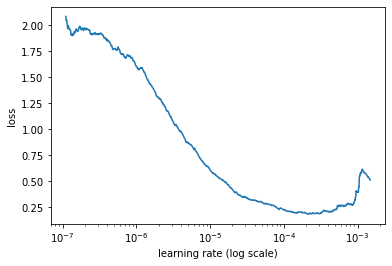

In [9]:
learner.lr_plot()


In [11]:
learner.autofit(1e-4)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001...
Train for 119 steps, validate for 20 steps
Epoch 1/1024
119/119 [==============================] - 188s 2s/step - loss: 0.4784 - accuracy: 0.8682 - val_loss: 0.4395 - val_accuracy: 0.9087
Epoch 2/1024
119/119 [==============================] - 187s 2s/step - loss: 0.1764 - accuracy: 0.9515 - val_loss: 0.9085 - val_accuracy: 0.7885
Epoch 3/1024
119/119 [==============================] - 187s 2s/step - loss: 0.1359 - accuracy: 0.9618 - val_loss: 0.3810 - val_accuracy: 0.8974
Epoch 4/1024
119/119 [==============================] - 187s 2s/step - loss: 0.1280 - accuracy: 0.9648 - val_loss: 0.7755 - val_accuracy: 0.8542
Epoch 5/1024
118/119 [============================>.] - ETA: 1s - loss: 0.1118 - accuracy: 0.9690
Epoch 00005: Reducing Max LR on Plateau: new max lr will be 5e-05 (if not early_stopping).
119

In [12]:
loss, acc = learner.model.evaluate_generator(learner.val_data, 
                                             steps=len(learner.val_data))

In [13]:
print('final loss:%s, final accuracy:%s' % (loss, acc))

final loss:0.3809508830308914, final accuracy:0.8974359


In [14]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [15]:
predictor.predict_filename('/content/chestxraydata/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')

['PNEUMONIA']

In [17]:
predictor.predict_filename('/content/chestxraydata/chest_xray/test/NORMAL/IM-0001-0001.jpeg')

['NORMAL']

In [18]:
predictor.predict_filename('/content/chestxraydata/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg')

['NORMAL']

In [19]:
predictor.predict_filename('/content/chestxraydata/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg')

['NORMAL']

In [20]:
predictor.predict_filename('/content/chestxraydata/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg')

['PNEUMONIA']

In [21]:
predictor.predict_folder('/content/chestxraydata/chest_xray/val/PNEUMONIA')[:8]

Found 8 images belonging to 1 classes.


[('PNEUMONIA/person1946_bacteria_4874.jpeg', 'PNEUMONIA'),
 ('PNEUMONIA/person1946_bacteria_4875.jpeg', 'PNEUMONIA'),
 ('PNEUMONIA/person1947_bacteria_4876.jpeg', 'PNEUMONIA'),
 ('PNEUMONIA/person1949_bacteria_4880.jpeg', 'NORMAL'),
 ('PNEUMONIA/person1950_bacteria_4881.jpeg', 'PNEUMONIA'),
 ('PNEUMONIA/person1951_bacteria_4882.jpeg', 'PNEUMONIA'),
 ('PNEUMONIA/person1952_bacteria_4883.jpeg', 'PNEUMONIA'),
 ('PNEUMONIA/person1954_bacteria_4886.jpeg', 'NORMAL')]

In [22]:
predictor.predict_folder('/content/chestxraydata/chest_xray/val/NORMAL')[:8]

Found 8 images belonging to 1 classes.


[('NORMAL/NORMAL2-IM-1427-0001.jpeg', 'NORMAL'),
 ('NORMAL/NORMAL2-IM-1430-0001.jpeg', 'NORMAL'),
 ('NORMAL/NORMAL2-IM-1431-0001.jpeg', 'NORMAL'),
 ('NORMAL/NORMAL2-IM-1436-0001.jpeg', 'PNEUMONIA'),
 ('NORMAL/NORMAL2-IM-1437-0001.jpeg', 'NORMAL'),
 ('NORMAL/NORMAL2-IM-1438-0001.jpeg', 'NORMAL'),
 ('NORMAL/NORMAL2-IM-1440-0001.jpeg', 'NORMAL'),
 ('NORMAL/NORMAL2-IM-1442-0001.jpeg', 'NORMAL')]